# **Import Libraries**



In [ ]:
# Import pandas into the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# **Data Analysis**

In [ ]:
# Import marketing.csv 
marketing = pd.read_csv('/content/marketing.csv')
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


In [ ]:
# Print the statistics of all columns
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [ ]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


# **Updating the data type of a column**

In [ ]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [ ]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype("bool")

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


# **Adding new columns**

In [ ]:
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [ ]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

# **Conversion of columns in DateTime Format**

In [ ]:
marketing.date_served = pd.to_datetime(marketing.date_served)
marketing.date_subscribed = pd.to_datetime(marketing.date_subscribed)
marketing.date_canceled = pd.to_datetime(marketing.date_canceled)

In [ ]:
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

# **Daily marketing reach by channel**


In [ ]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


# **Visualizing daily marketing reach**

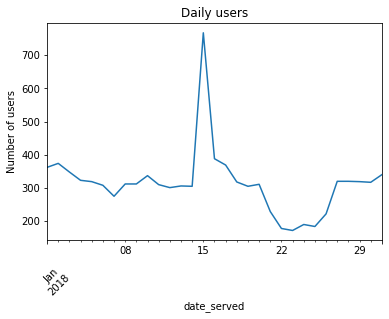

In [ ]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

# **Calculating conversion rate**

In [ ]:
# Calculate the number of people we marketed to
total = marketing["user_id"].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


# **Calculating retention rate**

In [ ]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing["is_retained"]== True]["user_id"].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

686.4 %


# **Comparing language conversion rate (I)**

In [ ]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers["user_id"].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers["converted"] == True]["user_id"].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


# **Comparing language conversion rate (II)**

In [ ]:
# Group by language_displayed and count unique users
total = marketing.groupby("language_displayed")["user_id"].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing["converted"]== True].groupby("language_displayed")["user_id"].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


# **Aggregating by date**

In [ ]:
# Group by date_served and count unique users
total = marketing.groupby("date_served")["user_id"].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing["converted"]== True].groupby("date_served")["user_id"].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)


date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


# **Visualize conversion rate by language**

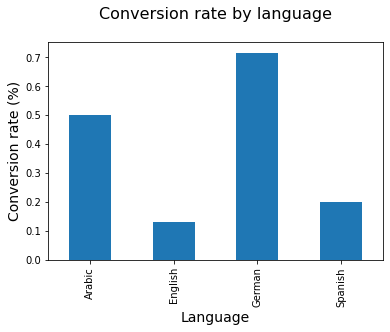

In [ ]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = "bar")

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

# **Setting up our data to visualize daily conversion**

In [ ]:
# Reset index to turn the results into a DataFrame
daily_conversion_rates = pd.DataFrame(daily_conversion_rate.reset_index())

# Rename columns
daily_conversion_rates.columns = ['date_served', 
                              'conversion_rate']

# **Visualize daily conversion rate**

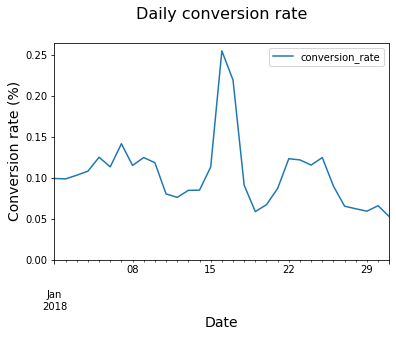

In [ ]:
# Create a line chart using daily_conversion_rate
daily_conversion_rates.plot("date_served", "conversion_rate")

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

# **Marketing channels across age groups**

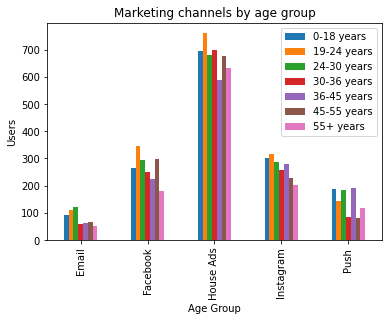

In [ ]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level =1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

# **Grouping and counting by multiple columns**

In [ ]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                    "subscribing_channel"])["user_id"].nunique()

# Print results
print(retention_total.head())


date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [ ]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing["is_retained"]== True].groupby(['date_subscribed', "subscribing_channel"])["user_id"].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


# **Analyzing retention rates for the campaign**

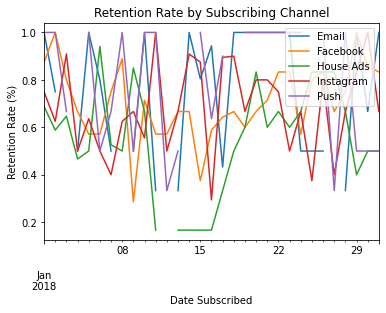

In [ ]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = "upper right",labels = retention_rate_df.columns.values)
plt.show()

# **A/B Testing**

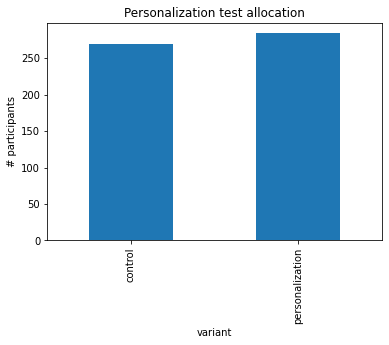

In [ ]:
# Subset the DataFrame
email = marketing[marketing["marketing_channel"]== "Email"]

# Group the email DataFrame by variant 
alloc = email.groupby("variant")["user_id"].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = "bar")
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

# **Comparing conversion rates**

In [ ]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             "variant"])["converted"].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df["control"].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df["personalization"].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


# **Creating a lift function**

In [ ]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = a_mean-b_mean/b_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

-71.85%
